In [1]:
import sys
sys.path.append("/home/alex/Documents/Doktorarbeit/PiezoHysteresis/python")

import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.optimize import root

import hdf5_tools as h5
from alex_lib import f2t,t2f,matplot, vec2matMH
import numpy as np

%alias cubit /opt/programs/cubit/Coreform-Cubit-2021.4/bin/coreform_cubit
%alias cfs /home/alex/Devel/CFS_BIN/buildHysteria/bin/cfs

mpl.rc('figure',figsize=[2.7,1.6]) # figure size in inch
mpl.rc('figure',dpi=200) # inline dpi (=display size in browser)
mpl.rc('font',size=5)
#mpl.rcParams['font.sans-serif'] = 'Helvetica'
mpl.rc('lines',linewidth=0.8) 
mpl.rc('grid',linewidth=0.3,linestyle=':')
mpl.rc('legend',fontsize='small',framealpha=1.0,numpoints=1)
mpl.rc('svg',fonttype='none')
mpl.rc('savefig',dpi=300)

In [2]:

file ="PrismaHyst_transient.h5ref"

Nt=256

Text(0.5, 0.98, 'Over all elements')

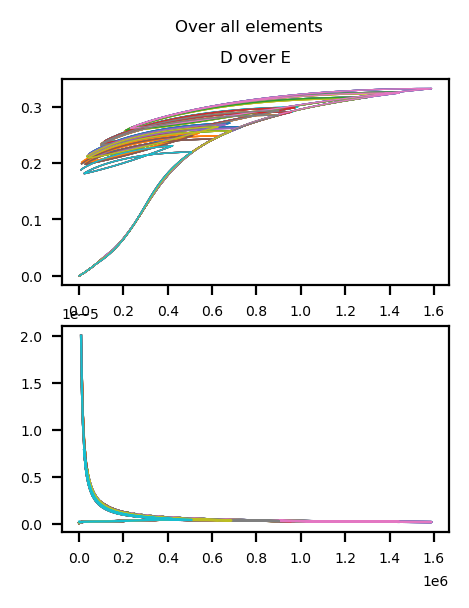

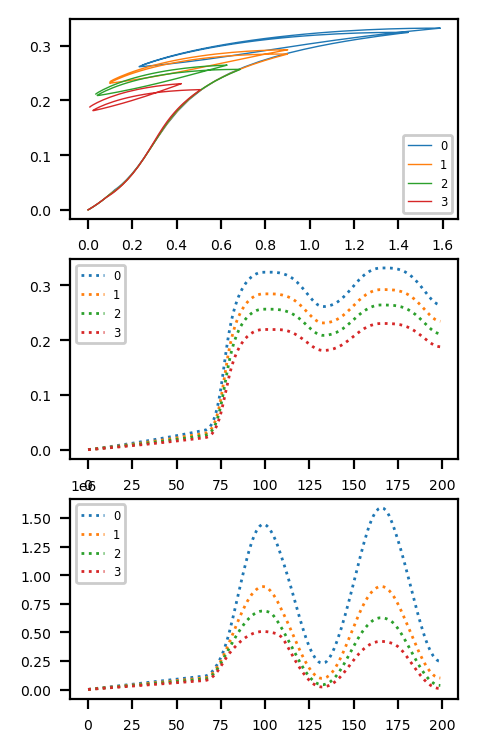

In [3]:
from matplotlib import cm

fig, ax = plt.subplots(2,figsize=(2.5,1.5*2))
fig2, ax2 = plt.subplots(3,figsize=(2.5,1.5*3))

## What it should look like:
E_ep = np.genfromtxt("E_ep_NL.fnc")
maxElemNum = 0

maxElemNum = h5.get_result(file,"elecFieldIntensity",step="all")[:,:,0].shape[1]

start = 0.2
stop = 1
number_of_lines= maxElemNum
cm_subsection = np.linspace(start, stop, number_of_lines) 

colors = [ cm.magma(x) for x in cm_subsection ]

elecField_x=h5.get_result(file,"elecFieldIntensity",step="all")[:,:,0]
elecField_y=h5.get_result(file,"elecFieldIntensity",step="all")[:,:,1]
elecField_z=h5.get_result(file,"elecFieldIntensity",step="all")[:,:,2]

epsilon=h5.get_result(file,"elecElemPermittivity",step="all")

for ElemNum in range(maxElemNum):

    elecField_elem=np.sqrt(elecField_x[:,ElemNum]**2+elecField_y[:,ElemNum]**2+elecField_z[:,ElemNum]**2)
    epsilon_t = epsilon[:,ElemNum]

    elecFlux_elem = elecField_elem*epsilon_t

    ax[0].plot(elecField_elem,elecFlux_elem, lw=0.5)

    ax[1].plot(elecField_elem,epsilon_t)

    if ElemNum in [0,1,2,3]:

        ax2[0].plot(elecField_elem,elecFlux_elem, label = str(ElemNum), lw= "0.5")
        ax2[1].plot(elecFlux_elem,ls = ":", lw= "1", label = str(ElemNum))
        ax2[2].plot(elecField_elem,ls = ":", lw= "1", label = str(ElemNum))

ax[0].set_title("D over E")

ax2[0].legend()
ax2[1].legend()
ax2[2].legend()

fig.suptitle("Over all elements")
